# Titanic Survival Prediction Analysis

Notebook ini digunakan untuk menjawab soal analisis dan prediksi kelangsungan hidup penumpang Titanic berdasarkan dataset `titanic.csv`.
Dataset ini berasal dari kompetisi klasifikasi biner (selamat atau tidak selamat).

## 1. Hipotesis Awal

"Kelangsungan hidup penumpang Titanic dipengaruhi oleh atribut-atribut seperti jenis kelamin, usia, kelas kabin, tarif yang dibayar, dan status hubungan keluarga yang menyertai mereka selama pelayaran."

Hipotesis ini didasarkan pada beberapa asumsi awal yang logis dan historis:
- `Jenis Kelamin`: Penumpang perempuan cenderung memiliki kemungkinan selamat lebih tinggi karena prinsip evakuasi "wanita dan anak-anak dulu".

- `Usia`: Anak-anak kemungkinan mendapat prioritas dalam evakuasi.

- `Kelas (Pclass)`: Penumpang kelas satu mungkin memiliki akses lebih cepat ke sekoci penyelamat.

- `Tarif (Fare)`: Tarif yang lebih mahal bisa menunjukkan fasilitas dan lokasi kabin yang lebih dekat ke sekoci.

- `Keluarga (SibSp & Parch)`: Penumpang yang bepergian dengan keluarga mungkin memiliki perilaku berbeda saat evakuasi, yang bisa mempengaruhi kelangsungan hidup mereka.

## 2. Exploratory Data Analysis (EDA)

Informasi Umum Dataset

Total data: 891 penumpang
Kolom penting:
`Survived`: Target (0 = Tidak selamat, 1 = Selamat)

`Pclass`: Kelas penumpang (1 = atas, 3 = bawah)

`Sex`: Jenis kelamin

`Age`: Usia (beberapa data hilang)

`SibSp`: Jumlah saudara/istri/suami di kapal

`Parch`: Jumlah orang tua/anak di kapal

`Fare`: Tarif tiket

`Embarked`: Pelabuhan naik (S = Southampton, C = Cherbourg, Q = Queenstown)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Missing value check
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


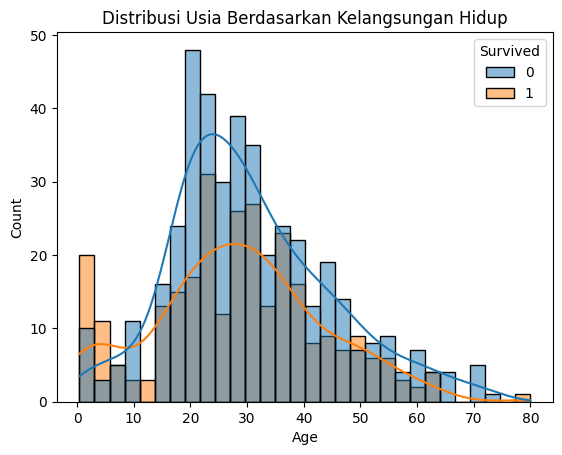

In [6]:
# Visualisasi distribusi umur berdasarkan survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Distribusi Usia Berdasarkan Kelangsungan Hidup")
plt.show()

## Analisis Umum Visualisasi Distribusi Kelangsungan Hidup
- `Anak-anak (usia < 10 tahun)`: Tampaknya memiliki kemungkinan bertahan hidup yang lebih tinggi, hal ini ditunjukkan dengan puncak grafik pada kategori “selamat” untuk kelompok usia ini.
- `Dewasa muda (sekitar 20–40 tahun)`: Distribusinya terlihat cukup merata, namun jumlah yang tidak selamat cukup signifikan di rentang usia ini.
- `Lansia (usia > 60 tahun)`: Meski jumlah penumpangnya sedikit, persentase yang selamat cenderung lebih rendah, kemungkinan karena keterbatasan fisik atau akses terhadap pertolongan.

## Insight
> Data visual menunjukkan bahwa hipotesis awal mengenai peluang bertahan hidup yang lebih besar pada usia muda cukup terbukti. Terlihat bahwa anak-anak mendominasi kelompok yang berhasil selamat dibandingkan dengan kelompok usia lain.

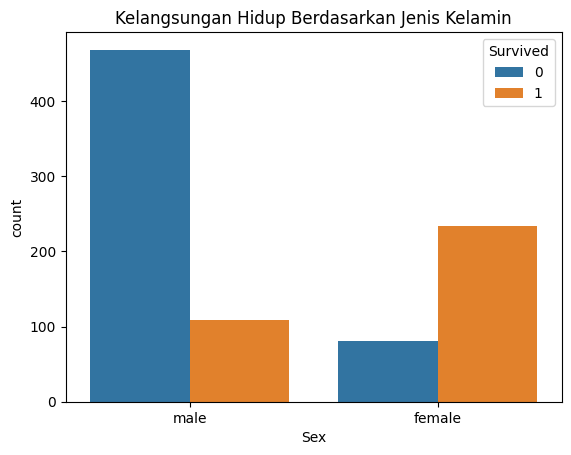

In [7]:
# Proporsi jenis kelamin dan survival
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Kelangsungan Hidup Berdasarkan Jenis Kelamin")
plt.show()

 ## Analisis Umum Visualisasi:
 > Berdasarkan grafik yang ditampilkan, jumlah penumpang perempuan yang berhasil selamat tampak jauh lebih tinggi dibandingkan dengan yang tidak selamat. Sementara itu, meskipun penumpang laki-laki memiliki jumlah yang lebih besar secara keseluruhan, sebagian besar dari mereka tidak berhasil bertahan.

 > Hipotesis yang diajukan menyatakan bahwa perempuan cenderung memiliki peluang selamat yang lebih tinggi dalam tragedi Titanic.

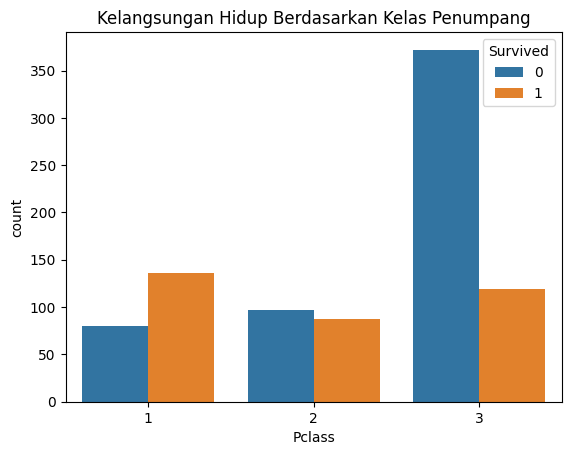

In [8]:
# Survival berdasarkan kelas penumpang
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Kelangsungan Hidup Berdasarkan Kelas Penumpang")
plt.show()

## Analisis Visual Umum dari Grafik di atas :
> Penumpang dari kelas 1 (kelas atas) terlihat memiliki jumlah yang selamat lebih banyak dibandingkan yang tidak. Untuk kelas 2, jumlah penumpang yang selamat dan tidak selamat hampir seimbang. Sementara itu, sebagian besar penumpang dari kelas 3 (kelas bawah) tidak selamat. Artinya, semakin tinggi kelas tiket penumpang, semakin besar pula peluang keselamatan mereka.

## Insight :
> Penumpang dari kelas atas (Pclass = 1) kemungkinan mendapat keuntungan akses yang lebih cepat terhadap evakuasi dan fasilitas penyelamatan, sehingga tingkat keselamatan mereka cenderung lebih tinggi.

## 3. Model Algoritma & Alasan Pemilihan
Model yang dipilih : Logistic Regression

**Alasan**
> Model ini sederhana namun efektif untuk klasifikasi biner seperti prediksi kelangsungan hidup. Logistic Regression bekerja dengan baik pada data yang bersih dan linier. Model ini juga cepat dalam pelatihan, mudah diinterpretasikan, dan cocok sebagai baseline karena memberikan hasil yang stabil tanpa banyak parameter tuning.

In [9]:
# 3. Model dengan Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [10]:
# Salin data
data = df.copy()

In [11]:
# Preprocessing
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# Tangani missing value pada 'Embarked'
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Tangani missing value pada fitur numerik
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

/tmp/ipython-input-11-4084961435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-11-4084961435.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [12]:
# Fitur dan label
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)  # Tambahan max_iter untuk menghindari warning
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [13]:
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Presisi:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Akurasi: 0.8100558659217877
Presisi: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


## Hasil Evaluasi Model "Linear Regression" yang digunakan:
- `Akurasi : 0.81`, Artinya 81% dari seluruh prediksi model sesuai dengan data sebenarnya. Ini menunjukkan performa model cukup baik secara keseluruhan.

- `Presisi : 0.79`, Artinya dari seluruh penumpang yang diprediksi selamat oleh model, sekitar 79% memang benar-benar selamat. Ini menunjukkan model cukup andal dalam meminimalkan false positives.

- `Recall : 0.74`, Artinya dari seluruh penumpang yang benar-benar selamat, model berhasil mengidentifikasi sekitar 74% di antaranya. Ini menunjukkan bahwa model cukup peka terhadap kasus positif (selamat).

- `F1 Score : 0.76`, Artinya nilai F1 yang cukup seimbang ini menandakan model mampu menjaga keseimbangan antara presisi dan recall.


---


## Rumus Evaluasi

### 1. Accuracy
Mengukur seberapa banyak prediksi yang benar dari seluruh data.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **TP (True Positive):** Selamat, diprediksi selamat
- **TN (True Negative):** Tidak selamat, diprediksi tidak selamat
- **FP (False Positive):** Tidak selamat, tapi diprediksi selamat
- **FN (False Negative):** Selamat, tapi diprediksi tidak selamat


### 2. Precision
Mengukur seberapa akurat model dalam memprediksi **penumpang yang selamat**.


$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

> Dari semua penumpang yang diprediksi akan selamat, berapa persen yang benar-benar selamat?


### 3. Recall
Mengukur seberapa baik model menangkap semua penumpang yang **sebenarnya selamat**.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

> Dari semua penumpang yang benar-benar selamat, berapa persen yang berhasil diprediksi oleh model?



### 4. F1 Score
F1 Score adalah rata-rata harmonik dari precision dan recall. Ini berguna saat kita ingin menyeimbangkan keduanya.

$$
\text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

> Nilai F1 yang tinggi menunjukkan bahwa model tidak hanya akurat, tapi juga peka terhadap kasus positif.



## Interpretasi Hasil Evaluasi

| Metrik    | Nilai (%) | Penjelasan Singkat |
|-----------|-----------|--------------------|
| **Akurasi** | `81.01%` | Model berhasil memprediksi dengan benar sekitar 81 dari 100 penumpang |
| **Presisi** | `78.57%` | Dari 100 penumpang yang diprediksi selamat, sekitar 79 benar-benar selamat |
| **Recall**  | `74.32%` | Dari 100 penumpang yang benar-benar selamat, sekitar 74 berhasil teridentifikasi |
| **F1 Score**| `76.39%` | KModel cukup seimbang dalam meminimalkan false positives dan false negatives |


- Model Logistic Regression menunjukkan performa yang cukup baik dengan akurasi di atas 80%.
- Nilai F1 Score 76.39% menunjukkan keseimbangan yang cukup stabil antara ketepatan dan cakupan prediksi.
- Berdasarkan eksplorasi sebelumnya, fitur yang kemungkinan paling berpengaruh terhadap prediksi kelangsungan hidup adalah:
Jenis Kelamin, Kelas Penumpang (Pclass), dan Usia (Age).

## 4. Wawasan Berdasarkan Analisis Logistic Regression pada Data Titanic

- Berdasarkan hasil analisis, penumpang **perempuan memiliki kemungkinan selamat yang jauh lebih tinggi** dibanding laki-laki. Hal ini terlihat dari kontribusi fitur `Sex` yang sangat signifikan dalam model.

- Penumpang dari **kelas 1** cenderung lebih banyak yang selamat dibanding kelas 2 dan 3. Ini mengindikasikan bahwa **kelas sosial** berperan penting terhadap **akses ke fasilitas penyelamatan**, seperti sekoci.

- **Anak-anak (usia di bawah 12 tahun)** memiliki tingkat keselamatan yang lebih tinggi, yang mencerminkan **prioritas evakuasi untuk kelompok rentan.**

- **Jumlah keluarga di kapal** (fitur `SibSp` dan `Parch`) juga memengaruhi peluang bertahan hidup. Memiliki keluarga di sekitar kemungkinan dapat membantu proses evakuasi lebih cepat atau lebih terorganisir.

- Berdasarkan kontribusinya terhadap prediksi model Logistic Regression, fitur yang paling berpengaruh adalah: `Sex`, `Pclass`, `Age`, dan `Fare`. Ini menunjukkan bahwa **jenis kelamin, kelas sosial, usia, dan kemampuan ekonomi** merupakan faktor-faktor kunci yang berkaitan erat dengan kelangsungan hidup penumpang Titanic.

## 5. Kesimpulan
> Hanya dengan data penumpang, kita dapat memprediksi kemungkinan selamat dalam tragedi Titanic dengan cukup akurat. Hal ini membuktikan bahwa data historis Titanic dapat dianalisis menggunakan pendekatan machine learning untuk memahami pola keselamatan penumpang.

> Melalui proses analisis eksploratif dan pemodelan, ditemukan bahwa **jenis kelamin, kelas penumpang, dan usia** merupakan faktor yang paling berpengaruh dalam menentukan kelangsungan hidup. Secara umum, **perempuan, penumpang kelas satu, dan anak-anak** memiliki peluang lebih besar untuk selamat dibanding kelompok lainnya.

> Model yang digunakan dalam analisis ini adalah **Logistic Regression**, yang menunjukkan performa cukup baik sebagai model dasar (baseline), dengan hasil evaluasi sebagai berikut:
  - `Akurasi: 81.01%`

  - `Presisi: 78.57%`

  - `Recall: 74.32%`
  
  - `F1 Score: 76.39%`

> Evaluasi ini menunjukkan bahwa model mampu menjaga keseimbangan antara **ketepatan prediksi dan kemampuan mengenali penumpang yang benar-benar selamat.** Dengan demikian, **metode data science terutama model Logistic Regression** dapat digunakan tidak hanya untuk membuat prediksi akurat, tetapi juga untuk mengungkap pola sosial dan keputusan yang terjadi dalam situasi darurat.